In [21]:
# Load all libraries

import xarray as xr
import pathlib
from os import listdir
import glob
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import gcsfs
import cartopy.crs as ccrs

In [2]:
cat = pd.read_csv('/data/keeling/a/cristi/a/esm_data/cesm2_lens_catalog.csv')
cat

,component,stream,case,member_id,variable,start_time,end_time,time_range,long_name,units,vertical_levels,frequency,path
0,atm,cam.h0,b.e21.BHISTcmip6.f09_g17.LE2-1001.001,1,TREFHT,1850-01,1859-12,185001-185912,Reference height temperature,K,1.0,month_1,/data/cristi/a/cristi/esm_data/cesm2_lens/b.e2...
1,atm,cam.h0,b.e21.BHISTcmip6.f09_g17.LE2-1001.001,1,TREFHT,1860-01,1869-12,186001-186912,Reference height temperature,K,1.0,month_1,/data/cristi/a/cristi/esm_data/cesm2_lens/b.e2...
2,atm,cam.h0,b.e21.BHISTcmip6.f09_g17.LE2-1001.001,1,TREFHT,1870-01,1879-12,187001-187912,Reference height temperature,K,1.0,month_1,/data/cristi/a/cristi/esm_data/cesm2_lens/b.e2...
3,atm,cam.h0,b.e21.BHISTcmip6.f09_g17.LE2-1001.001,1,TREFHT,1880-01,1889-12,188001-188912,Reference height temperature,K,1.0,month_1,/data/cristi/a/cristi/esm_data/cesm2_lens/b.e2...
4,atm,cam.h0,b.e21.BHISTcmip6.f09_g17.LE2-1001.001,1,TREFHT,1890-01,1899-12,189001-189912,Reference height temperature,K,1.0,month_1,/data/cristi/a/cristi/esm_data/cesm2_lens/b.e2...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
845,atm,cam.h0,b.e21.BHISTcmip6.f09_g17.LE2-1301.010,10,TREFHT,1970-01,1979-12,197001-197912,Reference height temperature,K,1.0,month_1,/data/cristi/a/cristi/esm_data/cesm2_lens/b.e2...
846,atm,cam.h0,b.e21.BHISTcmip6.f09_g17.LE2-1301.010,10,TREFHT,1980-01,1989-12,198001-198912,Reference height temperature,K,1.0,month_1,/data/cristi/a/cristi/esm_data/cesm2_lens/b.e2...
847,atm,cam.h0,b.e21.BHISTcmip6.f09_g17.LE2-1301.010,10,TREFHT,1990-01,1999-12,199001-199912,Reference height temperature,K,1.0,month_1,/data/cristi/a/cristi/esm_data/cesm2_lens/b.e2...
848,atm,cam.h0,b.e21.BHISTcmip6.f09_g17.LE2-1301.010,10,TREFHT,2000-01,2009-12,200001-200912,Reference height temperature,K,1.0,month_1,/data/cristi/a/cristi/esm_data/cesm2_lens/b.e2...


In [11]:
path_list = cat['path'].to_list()
path_red = []
for path_name in path_list:
    if 'LE2-1301' in path_name:
        path_red.append(path_name)
path_red

['/data/cristi/a/cristi/esm_data/cesm2_lens/b.e21.BHISTcmip6.f09_g17.LE2-1301.001.cam.h0.TREFHT.185001-185912.nc',
 '/data/cristi/a/cristi/esm_data/cesm2_lens/b.e21.BHISTcmip6.f09_g17.LE2-1301.001.cam.h0.TREFHT.186001-186912.nc',
 '/data/cristi/a/cristi/esm_data/cesm2_lens/b.e21.BHISTcmip6.f09_g17.LE2-1301.001.cam.h0.TREFHT.187001-187912.nc',
 '/data/cristi/a/cristi/esm_data/cesm2_lens/b.e21.BHISTcmip6.f09_g17.LE2-1301.001.cam.h0.TREFHT.188001-188912.nc',
 '/data/cristi/a/cristi/esm_data/cesm2_lens/b.e21.BHISTcmip6.f09_g17.LE2-1301.001.cam.h0.TREFHT.189001-189912.nc',
 '/data/cristi/a/cristi/esm_data/cesm2_lens/b.e21.BHISTcmip6.f09_g17.LE2-1301.001.cam.h0.TREFHT.190001-190912.nc',
 '/data/cristi/a/cristi/esm_data/cesm2_lens/b.e21.BHISTcmip6.f09_g17.LE2-1301.001.cam.h0.TREFHT.191001-191912.nc',
 '/data/cristi/a/cristi/esm_data/cesm2_lens/b.e21.BHISTcmip6.f09_g17.LE2-1301.001.cam.h0.TREFHT.192001-192912.nc',
 '/data/cristi/a/cristi/esm_data/cesm2_lens/b.e21.BHISTcmip6.f09_g17.LE2-1301.00

In [12]:
len(path_red)

170

In [19]:
path_versions = []
for num in range(0,170,17):
    version = path_red[num:num+17]
    path_versions.append(version)
path_versions

[['/data/cristi/a/cristi/esm_data/cesm2_lens/b.e21.BHISTcmip6.f09_g17.LE2-1301.001.cam.h0.TREFHT.185001-185912.nc',
  '/data/cristi/a/cristi/esm_data/cesm2_lens/b.e21.BHISTcmip6.f09_g17.LE2-1301.001.cam.h0.TREFHT.186001-186912.nc',
  '/data/cristi/a/cristi/esm_data/cesm2_lens/b.e21.BHISTcmip6.f09_g17.LE2-1301.001.cam.h0.TREFHT.187001-187912.nc',
  '/data/cristi/a/cristi/esm_data/cesm2_lens/b.e21.BHISTcmip6.f09_g17.LE2-1301.001.cam.h0.TREFHT.188001-188912.nc',
  '/data/cristi/a/cristi/esm_data/cesm2_lens/b.e21.BHISTcmip6.f09_g17.LE2-1301.001.cam.h0.TREFHT.189001-189912.nc',
  '/data/cristi/a/cristi/esm_data/cesm2_lens/b.e21.BHISTcmip6.f09_g17.LE2-1301.001.cam.h0.TREFHT.190001-190912.nc',
  '/data/cristi/a/cristi/esm_data/cesm2_lens/b.e21.BHISTcmip6.f09_g17.LE2-1301.001.cam.h0.TREFHT.191001-191912.nc',
  '/data/cristi/a/cristi/esm_data/cesm2_lens/b.e21.BHISTcmip6.f09_g17.LE2-1301.001.cam.h0.TREFHT.192001-192912.nc',
  '/data/cristi/a/cristi/esm_data/cesm2_lens/b.e21.BHISTcmip6.f09_g17.LE

In [21]:
new_lats=np.arange(-87,88,2)
new_lons=np.arange(1,359,2)
new_time_index=pd.date_range(start='1850-01-16',freq='M', periods=1980)

ds_version = []

for version in path_versions:
    ds_version.append(xr.open_mfdataset(version,combine='by_coords',use_cftime=True))

ds = xr.concat(ds_version, dim='version',coords='minimal', compat='override')
ds_reinterp = ds.TREFHT.interp(lat=new_lats, lon=new_lons)
ds_time = ds_reinterp.assign_coords(time=new_time_index)
ds_time.load()

<xarray.DataArray 'TREFHT' (version: 10, time: 1980, lat: 88, lon: 179)>
array([[[[249.20671936, 248.95150213, 248.88449682, ..., 249.93269714,
          249.81806997, 249.70186834],
         [250.46161007, 250.201263  , 250.05500497, ..., 251.91732449,
          251.5203548 , 251.20300301],
         [253.45790685, 253.0994033 , 252.68619478, ..., 255.08447715,
          254.74654287, 254.37330494],
         ...,
         [244.52150792, 245.04614187, 245.58627769, ..., 241.70185476,
          242.38145786, 243.18406776],
         [242.68788605, 243.10105472, 243.41689597, ..., 240.94394192,
          241.44196871, 241.87216254],
         [241.98651082, 242.22184469, 242.46315002, ..., 240.88744486,
          241.15546544, 241.48706202]],

        [[237.69156794, 237.39916128, 237.29390106, ..., 238.49573186,
          238.36419245, 238.21687943],
         [239.64262034, 239.24149907, 238.88944075, ..., 241.1342219 ,
          240.76482561, 240.41187414],
         [242.98028712, 242.51352973, 241.95965517, ..., 244.90257297,
          244.48228531, 244.0680053 ],
...
         [259.80389777, 260.44974186, 261.22291734, ..., 257.58050761,
          257.96195357, 258.52510627],
         [259.45296868, 259.98323398, 260.40770552, ..., 257.72228241,
          258.14609951, 258.54001312],
         [260.38866465, 260.5588502 , 260.76231486, ..., 259.73925181,
          259.89282481, 260.09243642]],

        [[247.68641301, 247.44301254, 247.38612747, ..., 248.31856227,
          248.24217351, 248.14280899],
         [248.54129249, 248.30669471, 248.11289427, ..., 249.45034612,
          249.20319917, 249.02442644],
         [250.71946416, 250.44886573, 250.11663878, ..., 252.24950999,
          251.89477895, 251.53308757],
         ...,
         [257.40264503, 257.83228807, 258.31363627, ..., 254.6944858 ,
          255.49829856, 256.30417735],
         [257.93077155, 258.2227356 , 258.46821764, ..., 256.79239858,
          257.15104506, 257.44143609],
         [259.16119059, 259.1927243 , 259.23129628, ..., 258.8697936 ,
          258.95587769, 259.06216766]]]])
Coordinates:
  * time     (time) datetime64[ns] 1850-01-31 1850-02-28 ... 2014-12-31
  * lat      (lat) int64 -87 -85 -83 -81 -79 -77 -75 ... 75 77 79 81 83 85 87
  * lon      (lon) int64 1 3 5 7 9 11 13 15 ... 343 345 347 349 351 353 355 357
Dimensions without coordinates: version
Attributes:
    units:         K
    long_name:     Reference height temperature
    cell_methods:  time: mean

In [22]:
ds_time.to_netcdf('/data/keeling/a/mailes2/a/lens_processed/CESM2_LENS_TAS.nc')

# Load omega 500 data

In [10]:
# Head to google catalog to get some vertical motion data

# Read in data catalog

df = pd.read_csv('https://storage.googleapis.com/cmip6/cmip6-zarr-consolidated-stores.csv')
df.head()

,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,zstore,dcpp_init_year,version
0,HighResMIP,CMCC,CMCC-CM2-HR4,highresSST-present,r1i1p1f1,Amon,ps,gn,gs://cmip6/CMIP6/HighResMIP/CMCC/CMCC-CM2-HR4/...,NaN,20170706
1,HighResMIP,CMCC,CMCC-CM2-HR4,highresSST-present,r1i1p1f1,Amon,rsds,gn,gs://cmip6/CMIP6/HighResMIP/CMCC/CMCC-CM2-HR4/...,NaN,20170706
2,HighResMIP,CMCC,CMCC-CM2-HR4,highresSST-present,r1i1p1f1,Amon,rlus,gn,gs://cmip6/CMIP6/HighResMIP/CMCC/CMCC-CM2-HR4/...,NaN,20170706
3,HighResMIP,CMCC,CMCC-CM2-HR4,highresSST-present,r1i1p1f1,Amon,rlds,gn,gs://cmip6/CMIP6/HighResMIP/CMCC/CMCC-CM2-HR4/...,NaN,20170706
4,HighResMIP,CMCC,CMCC-CM2-HR4,highresSST-present,r1i1p1f1,Amon,psl,gn,gs://cmip6/CMIP6/HighResMIP/CMCC/CMCC-CM2-HR4/...,NaN,20170706


In [11]:
# Find omega

df_vert = df.query("activity_id=='CMIP' & table_id == 'Amon' & variable_id == 'wap' & experiment_id == 'historical' & source_id == 'CESM2'")
df_vert

,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,zstore,dcpp_init_year,version
59851,CMIP,NCAR,CESM2,historical,r1i1p1f1,Amon,wap,gn,gs://cmip6/CMIP6/CMIP/NCAR/CESM2/historical/r1...,NaN,20190308
61663,CMIP,NCAR,CESM2,historical,r4i1p1f1,Amon,wap,gn,gs://cmip6/CMIP6/CMIP/NCAR/CESM2/historical/r4...,NaN,20190308
61797,CMIP,NCAR,CESM2,historical,r5i1p1f1,Amon,wap,gn,gs://cmip6/CMIP6/CMIP/NCAR/CESM2/historical/r5...,NaN,20190308
63149,CMIP,NCAR,CESM2,historical,r3i1p1f1,Amon,wap,gn,gs://cmip6/CMIP6/CMIP/NCAR/CESM2/historical/r3...,NaN,20190308
63207,CMIP,NCAR,CESM2,historical,r6i1p1f1,Amon,wap,gn,gs://cmip6/CMIP6/CMIP/NCAR/CESM2/historical/r6...,NaN,20190308
63388,CMIP,NCAR,CESM2,historical,r2i1p1f1,Amon,wap,gn,gs://cmip6/CMIP6/CMIP/NCAR/CESM2/historical/r2...,NaN,20190308
64545,CMIP,NCAR,CESM2,historical,r8i1p1f1,Amon,wap,gn,gs://cmip6/CMIP6/CMIP/NCAR/CESM2/historical/r8...,NaN,20190311
64891,CMIP,NCAR,CESM2,historical,r7i1p1f1,Amon,wap,gn,gs://cmip6/CMIP6/CMIP/NCAR/CESM2/historical/r7...,NaN,20190311
65090,CMIP,NCAR,CESM2,historical,r9i1p1f1,Amon,wap,gn,gs://cmip6/CMIP6/CMIP/NCAR/CESM2/historical/r9...,NaN,20190311
66334,CMIP,NCAR,CESM2,historical,r10i1p1f1,Amon,wap,gn,gs://cmip6/CMIP6/CMIP/NCAR/CESM2/historical/r1...,NaN,20190313


In [15]:
#this only needs to be created once
# From Ryan Abernathy's tutorial - Way 2
gcs = gcsfs.GCSFileSystem(token='anon')
fs = gcsfs.GCSFileSystem(token='anon', access='read_only')

# Regridding
new_lats=np.arange(-87,88,2)
new_lons=np.arange(1,359,2)

#time index to assign model times to
new_time_index=pd.date_range(start='1851-01-01',freq='M',periods=2988)
    
dset_list_wap = []
for zstore in df_vert.zstore.unique():
    ds = xr.open_zarr(fs.get_mapper(zstore),consolidated=True)
    ds = ds.wap.interp(lat=new_lats,lon=new_lons)
    ds = ds.sel(time=slice('1976','2006'))
    ds = ds.sel(plev=50000, method='nearest')
    ds = ds.mean('time')
    #print(dict(ds.dims))
    dset_list_wap.append(ds)

In [16]:
dset_list_wap

[<xarray.DataArray 'wap' (lat: 88, lon: 179)>
 dask.array<mean_agg-aggregate, shape=(88, 179), dtype=float32, chunksize=(88, 179), chunktype=numpy.ndarray>
 Coordinates:
     plev     float64 5e+04
   * lat      (lat) int64 -87 -85 -83 -81 -79 -77 -75 ... 75 77 79 81 83 85 87
   * lon      (lon) int64 1 3 5 7 9 11 13 15 ... 343 345 347 349 351 353 355 357,
 <xarray.DataArray 'wap' (lat: 88, lon: 179)>
 dask.array<mean_agg-aggregate, shape=(88, 179), dtype=float32, chunksize=(88, 179), chunktype=numpy.ndarray>
 Coordinates:
     plev     float64 5e+04
   * lat      (lat) int64 -87 -85 -83 -81 -79 -77 -75 ... 75 77 79 81 83 85 87
   * lon      (lon) int64 1 3 5 7 9 11 13 15 ... 343 345 347 349 351 353 355 357,
 <xarray.DataArray 'wap' (lat: 88, lon: 179)>
 dask.array<mean_agg-aggregate, shape=(88, 179), dtype=float32, chunksize=(88, 179), chunktype=numpy.ndarray>
 Coordinates:
     plev     float64 5e+04
   * lat      (lat) int64 -87 -85 -83 -81 -79 -77 -75 ... 75 77 79 81 83 85 87
   * 

In [18]:
#Make into an array
vert_ds = xr.concat(dset_list_wap, coords='minimal', compat='override', dim='version')
vert_ds

<xarray.DataArray 'wap' (version: 11, lat: 88, lon: 179)>
dask.array<concatenate, shape=(11, 88, 179), dtype=float32, chunksize=(1, 88, 179), chunktype=numpy.ndarray>
Coordinates:
    plev     float64 5e+04
  * lat      (lat) int64 -87 -85 -83 -81 -79 -77 -75 ... 75 77 79 81 83 85 87
  * lon      (lon) int64 1 3 5 7 9 11 13 15 ... 343 345 347 349 351 353 355 357
Dimensions without coordinates: version

In [19]:
vert_ds_mean = vert_ds.mean('version')

Text(0.5, 1.0, 'Vertical Motion at 500 mb (N=37)')

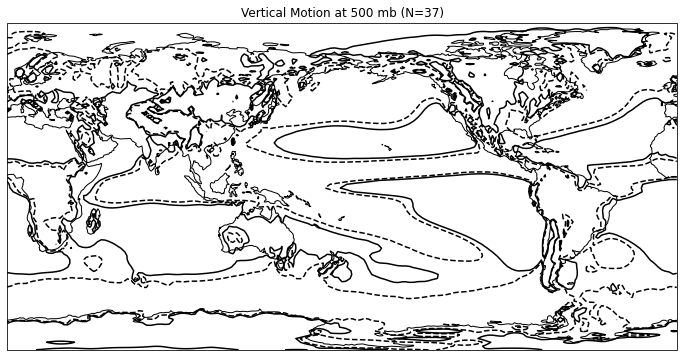

In [22]:
plt.rcParams['figure.figsize'] = [12, 7]
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=180))
vert_ds_mean.plot.contour(ax=ax, transform=ccrs.PlateCarree(), colors='black', levels=[-0.005,0.005])
ax.coastlines(color='black', linewidth=1)
plt.title('Vertical Motion at 500 mb (N=37)')

In [23]:
vert_ds_mean.load()

<xarray.DataArray 'wap' (lat: 88, lon: 179)>
array([[ 0.00783471,  0.00767819,  0.00743395, ...,  0.00780948,
         0.00787178,  0.00790871],
       [ 0.01691795,  0.01628177,  0.01570222, ...,  0.01976986,
         0.01905787,  0.01831051],
       [ 0.01437272,  0.014279  ,  0.01391879, ...,  0.01403967,
         0.01387929,  0.01409949],
       ...,
       [-0.004936  , -0.00465875, -0.00427571, ..., -0.00313777,
        -0.00400973, -0.00469245],
       [-0.00358264, -0.0036653 , -0.00365135, ..., -0.00240602,
        -0.00274605, -0.00309352],
       [-0.00261905, -0.00267595, -0.00272838, ..., -0.00239074,
        -0.00244512, -0.00250394]], dtype=float32)
Coordinates:
    plev     float64 5e+04
  * lat      (lat) int64 -87 -85 -83 -81 -79 -77 -75 ... 75 77 79 81 83 85 87
  * lon      (lon) int64 1 3 5 7 9 11 13 15 ... 343 345 347 349 351 353 355 357

In [24]:
vert_ds_mean.to_netcdf('/data/keeling/a/mailes2/a/lens_processed/CESM2_wap500.nc')